<h1>Figure 3</h1>
<p>The following files contain data used in the analyses for this figure:</p>
<table>
    <tr>
        <th>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="RawData/110930_2u_STOP_Copy_No_qPCR.csv" target=_blank>110930 2u STOP Copy No qPCR.csv</a></td>
        <td>qPCR-derived Ct values for 2u:C and 2u:max/2u:maxSTOP plasmids</td>
    </tr>
    <tr>
        <td><a href="RawData/110818_2u_CFlucs_Growth.csv" target=_blank>110818_2u_CFlucs_Growth.csv</a></td>
        <td>Growth rate data for 2u:C and 2u:max comparison</td>
    </tr>
    <tr>
        <td><a href="RawData/110807_Stop_FLuc_Growth.csv" target=_blank>110807 Stop FLuc Growth.csv</a></td>
        <td>Growth rate data for 2u:C and 2u:maxSTOP comparison</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

#load the functions for processing and normalising qPCR Ct data and for processing growth data by running 
#the corresponding scripts
%cd Scripts
%run qPCR.py
%run GR.py
%cd ..

C:\Users\Tvon-\Dropbox\Python\18 Codon Selection\Scripts
C:\Users\Tvon-\Dropbox\Python\18 Codon Selection


<h2>qPCR data</h2>

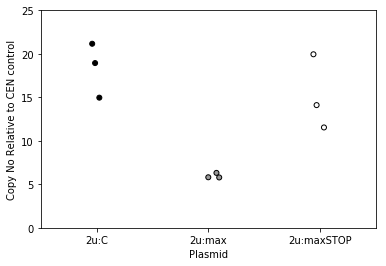

In [2]:
#read in an process qPCR data using the process_qPCR fucntion from file qPCR.py
qPCR_data = process_qPCR('RawData/110930_2u_STOP_Copy_No_qPCR.csv')
#plot data 
sns.set_palette(['#000000','#999999','#ffffff'])
sns.stripplot(x='Plasmid',y='fold_change_CEN',data=qPCR_data, 
              jitter=True, 
              order=['2u:C','2u:max','2u:maxSTOP'],
             edgecolor = '#000000',linewidth=1)
plt.ylabel('Copy No Relative to CEN control')
plt.xlabel('Plasmid')
plt.ylim(0,25)
#plt.savefig('Figure 3a.svg')
plt.show()

In [3]:
#do statistics for comparisons with 2u:C
alphas = [0.05,0.01,0.001]

#if stats_results is alrady present in locals, delete it
if 'stats_results' in locals():
    del stats_results

#do the statistical tests for each level defined in alphas
for alpha in alphas:
    #do the actual test at this level
    mc = MultiComparison(qPCR_data['fold_change_CEN'], qPCR_data['Plasmid'])
    result = mc.tukeyhsd(alpha=alpha)
    #recover the results into a data frame and rename the columns
    result_frame = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
    result_frame = result_frame.loc[result_frame['group1'] == '2u:C'].iloc[:,[1,5]]
    newcolname = "p = " + str(alpha)
    result_frame = result_frame.rename(index=str, columns={"group2":'Plasmid',"reject": newcolname})
    #add the results at this level to stats_results
    if 'stats_results' in locals():
        stats_results = pd.merge(stats_results, result_frame,on='Plasmid')
    else:
        stats_results=result_frame

stats_results = stats_results.set_index('Plasmid')
print("Tukey HSD for comparison to 2u:C (True indicates that null hypothesis is rejected)")
print(stats_results.reindex(['2u:max','2u:maxSTOP']))

Tukey HSD for comparison to 2u:C (True indicates that null hypothesis is rejected)
            p = 0.05  p = 0.01  p = 0.001
Plasmid                                  
2u:max          True      True      False
2u:maxSTOP     False     False      False


<h2>Growth rate</h2>

In [4]:
#extract relative growth rates for C and max, and for C and maxSTOP (these are in separate data files)
GRmax = process_GR('RawData/110818_2u_CFlucs_Growth.csv')
GRmaxstop = process_GR('RawData/110807_Stop_FLuc_Growth.csv')
#discard data not relevant for this analysis (min and sta)
GRmax = GRmax.loc[GRmax['Plasmid'].isin(['2u:C','2u:max'])]
GRmaxstop = GRmaxstop.loc[GRmaxstop['Plasmid'].isin(['2u:C','2u:maxSTOP'])]

GR = pd.concat([GRmax,GRmaxstop])

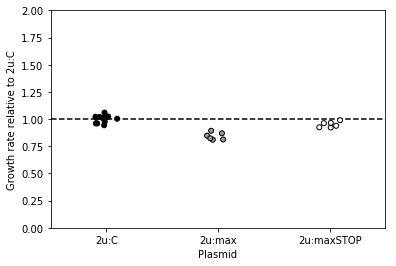

In [5]:
sns.set_palette(['#000000','#999999','#ffffff'])
sns.stripplot(x='Plasmid',y='Rel_GR',data=GR,jitter=True,
             edgecolor = '#000000',linewidth=1)
plt.ylabel('Growth rate relative to 2u:C')
plt.xlabel('Plasmid')
plt.ylim(0,2)
plt.axhline(1, ls='dashed')
#plt.savefig('Figure 3b.svg')
plt.show()

In [6]:
#do statistics for comparisons with 2u:C
alphas = [0.05,0.01,0.001]

#if stats_results is alrady present in locals, delete it
if 'stats_results' in locals():
    del stats_results

#do the statistical tests for each level defined in alphas
for alpha in alphas:
    #do the actual test at this level
    mc = MultiComparison(GR['Rel_GR'], GR['Plasmid'])
    result = mc.tukeyhsd(alpha=alpha)
    #recover the results into a data frame and rename the columns
    result_frame = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
    result_frame = result_frame.loc[result_frame['group1'] == '2u:C'].iloc[:,[1,5]]
    newcolname = "p = " + str(alpha)
    result_frame = result_frame.rename(index=str, columns={"group2":'Plasmid',"reject": newcolname})
    #add the results at this level to stats_results
    if 'stats_results' in locals():
        stats_results = pd.merge(stats_results, result_frame,on='Plasmid')
    else:
        stats_results=result_frame

stats_results = stats_results.set_index('Plasmid')
print(stats_results.reindex(['2u:max','2u:maxSTOP']))

            p = 0.05  p = 0.01  p = 0.001
Plasmid                                  
2u:max          True      True       True
2u:maxSTOP      True     False      False
